# ECE 445 (ML for ENGG): Mini Jupyter Exercise #2

*Eric Jiang
ewj12 158002948*

9/27/2018

In [511]:
import matplotlib as plt
import matplotlib.pyplot as pltp
import mpl_toolkits.mplot3d as plt3d
import numpy as np
%matplotlib inline

**Synthetic Data**

Problem 1

use np.random.normal(mean,variance,(rows,cols))

In [2]:
from numpy.linalg import matrix_rank
A = np.random.normal(0,1,(3,2))
print(A)
print(matrix_rank(A))


[[ 0.43957217 -0.42179552]
 [-0.53426297 -0.33264878]
 [-0.34086233 -0.14689936]]
2


**Generation of Dataset #1**

Problem 1

In [3]:
'''
#This doesn't work for some reason...
X = np.empty([3,500])
V = np.empty([2,500])

for i in range(0,499):
    v = np.random.normal(0,1,(2))
    np.hstack((V,v))
    x = A@v
    np.hstack((X,x))
    
    #Alternatively could use:
    #np.c_[V,v]
    #np.c_[X,A@v]
    #use np.r_[mat1,mat2] for vstack (rows)
    #this took me forever to figure out!
'''

n = 500
V = np.zeros((2,n)) # Pre-allocate matrix
X = np.zeros((3,n))
for i in range(0,n):
    v = np.random.normal(0,1,(2))
    x = A@v
    V[:,i] = v # array V(2x500) storing vi's
    X[:,i] = x # array X(3x500) storing xi's

print('The dimensionality of array X is:', np.shape(X))

X1 = A@V
print('\nThe rank of X=A(3x2)V(2x500) is:', matrix_rank(X1))

The dimensionality of array X is: (3, 500)

The rank of X=A(3x2)V(2x500) is: 2


Since the x=Av data pts have dimensions of 3x1, with 500 cols of the 3 rowed x's then X's dimensions (3,500) confirms my expectations

Rank of 2 may possibly be due to the fact that X's multipliers A & V both can only have a rank of 2 given max 2 rows in V and max 2 cols in A

**Singular Value and Eigenvalue Decomposition of Dataset #1**

Problem 1

In [4]:
from numpy import linalg as la

B= '\033[1m'
E= '\033[0m'

LS, DS, RS = la.svd(X, full_matrices=True) 
#print(X1.shape,LS.shape,DS.shape,RS.shape)
#reconstructX = LS @ np.diag(DS) @ RS
#la.norm(reconstructX-X)

#lS = Left Singular Vectors, DS = Singular Values, RS = Right Singular Vectors
XXt = X@X.T
#XXt = np.nan_to_num(XXt)
Eigval, Eigvec = la.eig(XXt)

# X's LS = XXt's Eigvec
print(B+'\nLeft Singular Vectors of X:\n'+E, LS,'\n')
print(B+'Eigenvectors of XXt:\n'+E,Eigvec,'\n')

# XXt's Eigvals = X's DS^2
print(B+'Eigenvalues of XXt:'+E,Eigval)
print(B+'Square of Singular Values of X:'+E,np.square(DS))

# X's Norm^2 = Sum of X's DS^2
print(B+'\nFrobenius Norm or Energy of X:'+E,la.norm(X)**2)
print(B+'Sum of squares of Singular Vals of X:'+E,np.sum(DS**2))

print(B+'\nSingular Values of X:'+E,DS)
print(B+'Left Singular Vectors of X\n'+E,LS)

print(B+'Two Largest Singular Values of X: \n'+E,DS[0],DS[1])
print(B+'Matrix A:\n'+E,A)


Left Singular Vectors of X:
 [[-0.58779258 -0.8048796   0.08166215]
 [ 0.6808457  -0.54666799 -0.48744563]
 [ 0.43697713 -0.2309176   0.86932621]] 

Eigenvectors of XXt:
 [[ 0.58779258 -0.8048796   0.08166215]
 [-0.6808457  -0.54666799 -0.48744563]
 [-0.43697713 -0.2309176   0.86932621]] 

Eigenvalues of XXt: [ 3.23954863e+02  1.43940551e+02 -9.63484569e-15]
Square of Singular Values of X: [3.23954863e+02 1.43940551e+02 1.01972644e-30]

Frobenius Norm or Energy of X: 467.89541409641055
Sum of squares of Singular Vals of X: 467.89541409641055

Singular Values of X: [1.79987462e+01 1.19975227e+01 1.00981505e-15]
Left Singular Vectors of X
 [[-0.58779258 -0.8048796   0.08166215]
 [ 0.6808457  -0.54666799 -0.48744563]
 [ 0.43697713 -0.2309176   0.86932621]]
Two Largest Singular Values of X: 
 17.998746150622246 11.997522706870425
Matrix A:
 [[ 0.43957217 -0.42179552]
 [-0.53426297 -0.33264878]
 [-0.34086233 -0.14689936]]


Problem 2

- None of the singular values are exactly zero because when singular value deconstruction is used there is noise in the separation. The noise causes the singular value to oscillate close to zero but not exactly zero.

- The relationship between the left singular vectors of X and the two largest singular values and the columns of A is that the columns of A multiplied by the singular values is approximately equal to the two largest columns of the left singular vectors.

**PCA of Dataset #1**

Problem 1


There only needs to be 2 principal components to capture all the data variation.

Since X was created by two 2-D arrays with max rank of 2 (both x,y variation), it can be assumed that the variation can only be along the 2-D space with the third dimension z being left at 0 variation. Thus there only needs to be two principal components along the x-y plane to capture all the data variation.

Problem 2

In [300]:
from numpy import array, dot, mean, std, empty, argsort
from numpy.linalg import eig, eigh, solve
from numpy.random import randn
from matplotlib.pyplot import subplots, show

def cov(data):
    return dot(data.T, data) / data.shape[0]

#PCA with eigenvalues, also centers the mean and scales the data
def nppca(data, pc_count = None):

    C9 = cov(data)
    E9, V9 = eigh(C9)
    key = argsort(E9)[::-1][:pc_count]
    E9, V9 = E9[key], V9[:, key]
    U9 = dot(data, V9)
    return U9, E9, V9

xtrans= nppca(X, 3)[0]
transmean = xtrans.mean()
print(B+'Estimated Value xk for k = 1,2,3:'+E,transmean)

#rs0, rs = eig(X.T@X)

Xmean = X.mean()
Xmeanvec = X.mean(0)
print(B+'\nMean of sum of X vectors:'+E,Xmean)

np.set_printoptions(threshold=20) #set thresh so doesn't print all 500 entries
print(B+'\nX vector mean entries all are ~ 0:\n'+E,Xmeanvec)

Estimated Value xk for k = 1,2,3: 4.718447854656915e-16

Mean of sum of X vectors: 3.552713678800501e-18

X vector mean entries all are ~ 0:
 [-3.70074342e-17  0.00000000e+00  1.38777878e-17 ... -1.85037171e-17
 -1.85037171e-17 -9.25185854e-18]


Problem 3

In [6]:
#Using the pca above for matrix X
Xtrans = nppca(X, 3)[0]

#Retrieving x, y PCs for U[PCx,PCy]
ux = np.reshape(Xtrans[:,0],(3,1)) #PCx
uy = np.reshape(Xtrans[:,1],(3,1)) #PCy
uz = np.reshape(Xtrans[:,2],(3,1)) #PCz
U = np.hstack((ux,uy))
'''
ux1 = np.reshape(LS[0],(3,1)) #PCx
uy1 = np.reshape(LS[:,1],(3,1))
U1 = np.hstack((LS[0],LS[1]))
print(LS[0],LS[1],U1)
'''
print(B+"Top two principal components U[PCx PCy]:\n"+E,U)
#print(uz) 

[-0.58779258 -0.8048796   0.08166215] [ 0.6808457  -0.54666799 -0.48744563] [-0.58779258 -0.8048796   0.08166215  0.6808457  -0.54666799 -0.48744563]
Top two principal components U[PCx, PCy]:
 [[ 28.73504595   1.68395816]
 [-17.71730551   9.99199624]
 [-11.01774044 -11.6759544 ]]


Problem 4

In [7]:
#Computing the feature vectors
pu = (la.inv(U.T@U))@U.T #projection of U ((Ut*U)^-1)*Ut
featvecs = pu@X #feature vectors from X projected onto U
print(B+'Feature vectors from X projected onto U:\n'+E,featvecs)

#reconstructing X
reconstructX = U@featvecs
print(B+'\nReconstructed X:\n'+E,reconstructX)
print(B+'Original X:\n'+E,X)

#Calculating the representation error
reperror = la.norm(reconstructX-X)**2
print(B+'\nShow that Representation Error ~0|=/=0:'+E,reperror)

Feature vectors from X projected onto U:
 [[-0.04736337 -0.04775767  0.04562971 ...  0.0487011  -0.04852646
  -0.04729364]
 [ 0.02676552  0.02277076 -0.03958523 ... -0.00619506  0.01131209
   0.02740838]]

Reconstructed X:
 [[-1.31591667 -1.33397394  1.24451201 ...  1.38899606 -1.37536102
  -1.31283035]
 [ 1.10659235  1.07366269 -1.20397105 ... -0.92475325  0.97278848
   1.11178026]
 [ 0.20932432  0.26031125 -0.04054095 ... -0.46424281  0.40257253
   0.20105009]]
Original X:
 [[-1.31591667 -1.33397394  1.24451201 ...  1.38899606 -1.37536102
  -1.31283035]
 [ 1.10659235  1.07366269 -1.20397105 ... -0.92475325  0.97278848
   1.11178026]
 [ 0.20932432  0.26031125 -0.04054095 ... -0.46424281  0.40257253
   0.20105009]]

Show that Representation Error ~0|=/=0: 3.554138698306385e-29


Problem 5

In [279]:

#Computing the feature vectors
pux = (la.inv(ux.T@ux))@ux.T #projection of U ((Ut*U)^-1)*Ut
featvecsx = pux@X #feature vectors from X projected onto U
print(B+'Feature vectors from X projected onto U:\n'+E,featvecsx)

#reconstructing X
reconstructX1 = ux@featvecsx
print(B+'\nReconstructed X:\n'+E,reconstructX1)
print(B+'Original X:\n'+E,X)

'''
pcs=X@xtrans[:,2]
print(pcs)
ux1 = np.reshape(pcs[:,0],(3,1))
uy1 = np.reshape(pcs[:,1],(3,1))
pcsu=np.hstack((ux1,uy1))

ux1t = np.reshape(pcs[:,0],(1,3))

proj0 = (la.inv(pcsu.T@pcsu))@pcsu.T@X
print('projection:\n',proj0)
recon0 = pcsu@proj0
print('reconstructed:\n',recon0)
print('original:\n',X)

reperror2 = la.norm(recon0-X)**2
print(B+'\nReperror:'+E,reperror2)
print(B+'Square Root of Reperror:'+E,reperror2**.5)

#(1x500)
#(3x500) = (3x1)(1x500)

from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X) #standardize all vals
features = x_std.T # features are columns from x_std
covariance_matrix = np.cov(features)
eig_vals, eig_vecs = la.eig(covariance_matrix)

#print('Eigenvectors:\n',eig_vecs) 
#print(B+'Eigenvalues:\n'+E,eig_vals) #Top eig vals determine top PCs
eigmax = np.amax(eig_vals)
# eig_vals[0]/sum(eig_vals) #Percentage of variances covered by eig_val PC
#print('\n\n\n',eig_vecs,'\nrow or col\n',eig_vecs.T[0])
projected_X = x_std.dot(eig_vecs.T[0]) # PC1 as projected onto X
print(projected_X)

feat_vecs2 = projected_X.T@X
print(feat_vecs2, ux)
print(projected_X.shape,feat_vecs2.shape)
reconX2 = projected_X@feat_vecs2
print(reconX2,'\n\n',X)
'''

#Calculating the representation error
reperror1 = la.norm(reconstructX1-X)**2
print(B+'\nReperror:'+E,reperror1)
print(B+'Square Root of Reperror:'+E,reperror**.5)
print(B+'Singular Values of X:'+E,DS)
print(B+'\nSquare Root of Reperror ~= 2nd largest Singular Value:\n'+E,reperror**.5,B+'~='+E,DS[1])


Feature vectors from X projected onto U:
 [[-0.04736337 -0.04775767  0.04562971 ...  0.0487011  -0.04852646
  -0.04729364]]

Reconstructed X:
 [[-1.36098869 -1.37231896  1.31117188 ...  1.39942828 -1.3944101
  -1.35898491]
 [ 0.83915135  0.8461373  -0.80843555 ... -0.86285223  0.85975814
   0.83791586]
 [ 0.52183735  0.52618166 -0.50273633 ... -0.53657605  0.53465196
   0.52106905]]
Original X:
 [[-1.31591667 -1.33397394  1.24451201 ...  1.38899606 -1.37536102
  -1.31283035]
 [ 1.10659235  1.07366269 -1.20397105 ... -0.92475325  0.97278848
   1.11178026]
 [ 0.20932432  0.26031125 -0.04054095 ... -0.46424281  0.40257253
   0.20105009]]

Reperror: 143.94055110187145
Square Root of Reperror: 11.997522706870425
Singular Values of X: [1.79987462e+01 1.19975227e+01 1.00981505e-15]

Square Root of Reperror ~= 2nd largest Singular Value:
 11.997522706870425 ~= 11.997522706870425


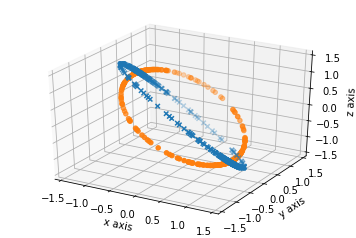

In [224]:
#plotting X and reconstructed X

fig = plt.pyplot.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

x1=reconstructX1[0]
y1=reconstructX1[1]
z1=reconstructX1[2]

ax.scatter(X[0],X[1],X[2], marker = 'x')
ax.scatter(x1,y1,z1)

'''
fig = plt.pyplot.figure()
bx = fig.add_subplot(111,projection='3d')
bx.set_xlabel('x axis')
bx.set_ylabel('y axis')
bx.set_zlabel('z axis')
bx.scatter(x1,y1,z1)
'''
plt.pyplot.show()


**Generation of Dataset #2**

Problem 1

In [112]:
c = np.random.normal(0,3,3)
print(c)

[ 3.23844787 -8.63061702  7.87192456]


Problem 2

In [319]:
n = 500
V2 = np.zeros((2,n)) # Pre-allocate matrix
X2 = np.zeros((3,n))
for i in range(0,n):
    v2 = np.random.normal(0,1,(2))
    x2 = A@v2+c
    V2[:,i] = v2 # array V(2x500) storing vi's
    X2[:,i] = x2 # array X(3x500) storing xi's

print(B+'Matrix Rank has increased due to c shift:'+E,matrix_rank(X2))

Matrix Rank has increased due to c shift: 3


**PCA, Centering, and Dataset #2**

Problem 1

In [313]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X2) #standardize all vals
features = x_std.T # features are columns from x_std
covariance_matrix = np.cov(features)
eig_vals, eig_vecs = la.eig(covariance_matrix)

#print('Eigenvectors:\n',eig_vecs) 
#print(B+'Eigenvalues:\n'+E,eig_vals) #Top eig vals determine top PCs
eigmax = np.amax(eig_vals)
# eig_vals[0]/sum(eig_vals) #Percentage of variances covered by eig_val PC
#print('\n\n\n',eig_vecs,'\nrow or col\n',eig_vecs.T[0])
projected_X = x_std.dot(eig_vecs.T[0]) # PC1 as eig_vecs projected onto X

print('junk code: calculating PCs with another more manual method')

junk code: calculating PCs with another more manual method


In [320]:
#PCA with eigenvalues, also centers the mean and scales the data
def nppca_no_center(data, pc_count = None):
    
    #Removed the mean vector centering
    C9 = cov(data)
    E9, V9 = eigh(C9)
    key = argsort(E9)[::-1][:pc_count]
    E9, V9 = E9[key], V9[:, key]
    U9 = dot(data, V9)
    return U9, E9, V9

#Use the no mean vector centering pca function
xpca2 = nppca_no_center(X2, 3)[0]

#Creating U[Ux Uy] for Top PCs
ux2 = np.reshape(xpca2[:,0],(3,1)) #PCx
uy2 = np.reshape(xpca2[:,1],(3,1)) #PCy
uz2 = np.reshape(xpca2[:,2],(3,1)) #PCz
U2 = np.hstack((ux2,uy2))
print(B+'Principal Components U[Ux Uy]:\n'+E, U2)

#Computing the feature vectors
pu2 = (la.inv(U2.T@U2))@U2.T #projection of U ((Ut*U)^-1)*Ut
featvecs2 = pu2@X2 #feature vectors from X projected onto U

#reconstructing X
reconstructX2 = U2@(featvecs2)
print(B+'\nReconstructed X:\n'+E,reconstructX2)
print(B+'Original X:\n'+E,X2)

#Calculating the representation error
reperror2 = la.norm(reconstructX2-X2)**2
print(B+'\nShow that Representation Error is NOT zero:'+E,reperror2)


Principal Components U[Ux Uy]:
 [[ -71.6442792    -6.35265933]
 [ 193.74014398    8.41257882]
 [-175.59711236   11.87369144]]

Reconstructed X:
 [[ 2.82428318  3.07714077  3.53496957 ...  2.55300868  3.30232149
   3.33792254]
 [-8.05715774 -8.45863032 -9.18681045 ... -7.62206823 -8.82842114
  -8.87692162]
 [ 8.23625598  7.97221403  7.49809849 ...  8.50583105  7.7754606
   7.71316231]]
Original X:
 [[ 2.94680299  2.72014229  2.45741771 ...  2.67964776  3.94839019
   2.98055371]
 [-7.9933884  -8.64444156 -9.74765667 ... -7.55615488 -8.49215409
  -9.06292562]
 [ 8.25662555  7.91286113  7.31894975 ...  8.52688547  7.88287296
   7.65374783]]

Show that Representation Error is NOT zero: 171.92259309383613


In [365]:
def nppca_mean_center(data, pc_count = None):
    
    data -= mean(data, 0) #Centering using the mean vector
    
    C9 = cov(data)
    E9, V9 = eigh(C9)
    key = argsort(E9)[::-1][:pc_count]
    E9, V9 = E9[key], V9[:, key]
    U9 = dot(data, V9)
    return U9, E9, V9

xpca2 = nppca_mean_center(X2, 3)[0]

#Creating U[Ux Uy] for Top PCs
ux2 = np.reshape(xpca2[:,0],(3,1)) #PCx
uy2 = np.reshape(xpca2[:,1],(3,1)) #PCy
uz2 = np.reshape(xpca2[:,2],(3,1)) #PCz
U2 = np.hstack((ux2,uy2))
print(B+'Principal Components U[Ux Uy]:\n'+E, U2)

#Computing the feature vectors
pu2 = (la.inv(U2.T@U2))@U2.T #projection of U ((Ut*U)^-1)*Ut
featvecs2 = pu2@X2 #feature vectors from X projected onto U

#reconstructing X
reconstructX2 = U2@(featvecs2)

#Calculating the representation error
reperror2 = la.norm(reconstructX2-X2)**2
print(B+'\nShow that Representation Error ~0|=/=0:'+E,reperror2)


Principal Components U[Ux Uy]:
 [[ -53.8232755   -12.03899845]
 [ 211.58086818    3.38785482]
 [-157.75759268    8.65114364]]

Show that Representation Error ~0|=/=0: 1.0846714187272472e-27


By using mean centering, the Representation Error is reduced back to ~ zero

**Generation of Dataset #3**

Problem 1

In [346]:
n = 500
V3 = np.zeros((2,n)) # Pre-allocate matrix
X3 = np.zeros((3,n))
for i in range(0,n):
    v3 = np.random.normal(0,1,(2))
    n = np.random.normal(0,0.01,(3))
    x3 = A@v3+n
    V3[:,i] = v3 # array V(2x500) storing vi's
    X3[:,i] = x3 # array X(3x500) storing xi's
    
print(X3)

[[ 0.58915591 -0.3457746   1.16628427 ... -0.82292673  0.15797107
  -1.28065328]
 [-0.37244081 -0.18733453 -0.82087984 ... -0.02631621 -0.08621362
   1.91153938]
 [-0.25944399 -0.06796835 -0.56481428 ...  0.07588708 -0.08540992
   1.17788016]]


In [347]:
normx = X3/la.norm(X3)
print(B+'Normalized variant:\n'+E,normx)

#printing rank of normx
print(B+'Rank of Normalized variant:\n'+E,matrix_rank(normx))

#computing singular values of normx
LS3, DS3, RS3 = la.svd(normx, full_matrices=True) 
print(B+'Singular Values of Normalized variant:\n'+E,DS3)

Normalized variant:
 [[ 0.02704168 -0.01587071  0.0535313  ... -0.03777153  0.00725072
  -0.05878072]
 [-0.01709467 -0.00859847 -0.03767758 ... -0.00120789 -0.00395712
   0.08773777]
 [-0.01190822 -0.00311968 -0.02592442 ...  0.00348314 -0.00392023
   0.05406354]]
Rank of Normalized variant:
 3
Singular Values of Normalized variant:
 [0.81283823 0.58240577 0.00987587]


It is shown that the noise has affected the matrix due to the Rank remaining a sphere as 3D and the singular values not equaling zero.

**PCA Denoising of Dataset #3**

Problem 1

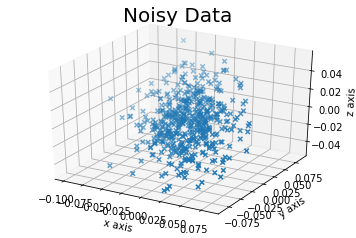

In [527]:
fig = plt.pyplot.figure()
cx = fig.add_subplot(111,projection='3d')
cx.set_xlabel('x axis')
cx.set_ylabel('y axis')
cx.set_zlabel('z axis')
pltp.title("Noisy Data", size = 20)

cx.scatter(normx[0],normx[1],normx[2], marker = 'x')
#ax.scatter(x1,y1,z1)

plt.pyplot.show()

Problem 2

In [358]:
#Denoising the normalized data
xpca3 = nppca_no_center(normx, 3)[0]

#Creating U[Ux Uy] for Top PCs
ux3 = np.reshape(xpca3[:,0],(3,1)) #PCx
uy3 = np.reshape(xpca3[:,1],(3,1)) #PCy
#uz3 = np.reshape(xpca3[:,2],(3,1)) #PCz
U3 = np.hstack((ux3,uy3))
print(B+'Principal Components U[Ux Uy]:\n'+E, U3)

#Computing the feature vectors
pu3 = (la.inv(U3.T@U3))@U3.T #projection of U ((Ut*U)^-1)*Ut
featvecs3 = pu3@normx #feature vectors from X projected onto U

#reconstructing X
reconstructX3 = U3@(featvecs3)
print(B+'\nReconstructed X:\n'+E,reconstructX3)
print(B+'Original X:\n'+E,normx)

Principal Components U[Ux Uy]:
 [[-0.37879072  0.51312218]
 [ 0.61160862  0.25797937]
 [ 0.37836288  0.09668897]]

Reconstructed X:
 [[ 0.02702716 -0.01588612  0.05351666 ... -0.03781599  0.00732303
  -0.05873625]
 [-0.01700762 -0.00850604 -0.03758977 ... -0.00094118 -0.00439086
   0.08747104]
 [-0.01206345 -0.00328452 -0.026081   ...  0.0030075  -0.00314671
   0.05453922]]
Original X:
 [[ 0.02704168 -0.01587071  0.0535313  ... -0.03777153  0.00725072
  -0.05878072]
 [-0.01709467 -0.00859847 -0.03767758 ... -0.00120789 -0.00395712
   0.08773777]
 [-0.01190822 -0.00311968 -0.02592442 ...  0.00348314 -0.00392023
   0.05406354]]


Problem 3

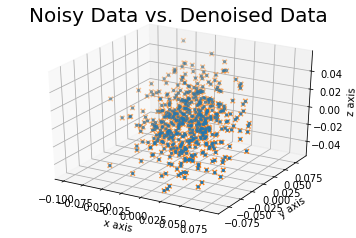

In [540]:
fig = plt.pyplot.figure()
dx = fig.add_subplot(111,projection='3d')
dx.set_xlabel('x axis')
dx.set_ylabel('y axis')
dx.set_zlabel('z axis')
pltp.title("Noisy Data vs. Denoised Data", size = 20)

dx.scatter(normx[0],normx[1],normx[2], marker = '.')
dx.scatter(reconstructX3[0],reconstructX3[1],reconstructX3[2], marker='x')
#ax.scatter(x1,y1,z1)

plt.pyplot.show()

The noisy data are the blue points and the denoised data are the orange points.

In [363]:
#Calculating the representation error
reperror = la.norm(reconstructX3-normx)**2
print(B+'Representation Error:'+E,reperror)
print(B+'Square of 3rd singular value:'+E,DS3[2]**2)

Representation Error: 9.753280051031796e-05
Square of 3rd singular value: 9.753280051031793e-05


Representation Error and sqaure of 3rd singular value are equal


**Real Data**

Problem 1

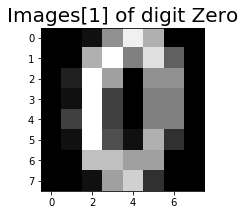

In [765]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as pltp

#digits = load_digits()
images, labels = load_digits(1, return_X_y=True)

#plotting first (or rather 2nd since index begins at 0) image of Zero digit: images[1]
pltp.figure(1, figsize=(3, 3))
pltp.imshow(np.reshape(images[1],(8,8)), cmap = pltp.get_cmap('gray'),interpolation='nearest')
pltp.title("Images[1] of digit Zero", size = 20)
pltp.show()

Problem 2

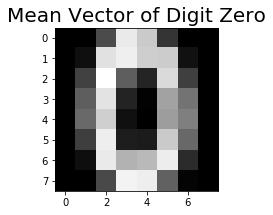

In [766]:
#Finding the mean vector of images data
meanvec = images.mean(0)

#Subtract meanvec from images to mean center
meanimages = images - meanvec

#plotting the mean vector
pltp.figure(1, figsize=(3, 3))
pltp.imshow(np.reshape(meanvec,(8,8)), cmap = pltp.get_cmap('gray'),interpolation='nearest')
pltp.title("Mean Vector of Digit Zero", size = 20)
pltp.show()

Problem 3

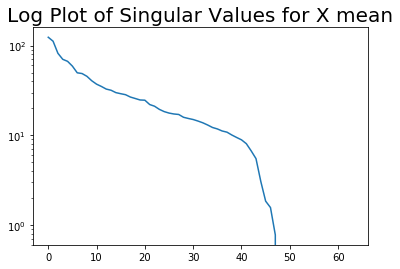

In [767]:
#Singular Value Decomposition of Mean Images Data
ls0, ds0, rs0 = la.svd(meanimages)

#Set tresh for very low Singular Values to =0 for Plotting
ds0[np.abs(ds0) < 0.0001] = 0

#Plotting Singular Values 
fig = pltp.figure()
ex = fig.add_subplot(1,1,1)
line = ex.plot(ds0)
pltp.title("Log Plot of Singular Values for X mean", size = 20)
ex.set_yscale('log')

In [768]:
#Finding the square of the norm of X mean
div = la.norm(meanvec.T)**2

#Set for loop to find k when sum_vars/norm >= 0.90
n = 200
sumz = 0
for i in range(0,n):
    varz = (np.var(meanimages.T[i]))**2
    sumz = sumz + varz
    resz = sumz/div
    if resz >= 0.90:
        break

#Set i+1 at break point to k (i is right below thresh, i+1 is above)
k = i+1
print(B+'Smallest integer k for >= 90:'+E,k)

Smallest integer k for >= 90: 45


Problem 4

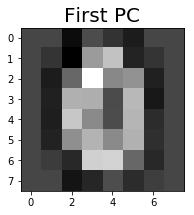

In [769]:
#PCA to find the Principal Components
#NOTE: Use meanimages.T to pca via columns not rows of data
xpcaz = nppca_no_center(meanimages.T)[0]

#plotting the first PC
#Note: Transpose the PCs back to original dims to display images
pltp.figure(1, figsize=(3, 3))
pltp.imshow(np.reshape(xpcaz.T[0],(8,8)), cmap = pltp.get_cmap('gray'),interpolation='nearest')
pltp.title("First PC", size = 20)
pltp.show()

Problem 5

In [774]:
#Creating U[Ux Uy] for Top PCs
uxz = np.reshape(xpcaz.T[0],(64,1)) #PCx
uyz = np.reshape(xpcaz.T[1],(64,1)) #PCy
uzz = np.reshape(xpcaz.T[2],(64,1)) #PCz
Uz = np.hstack((np.hstack((uxz,uyz)),uzz))
print(B+'Principal Components U[Ux Uy Uz]:\n'+E, Uz)

#Computing the feature vectors
puz = (la.inv(Uz.T@Uz))@Uz.T #projection of U ((Ut*U)^-1)*Ut
featvecsz = puz@meanimages.T #feature vectors from X projected onto U

#reconstructing X
reconstructXz = Uz@(featvecsz)

#Calculating the representation error
reperror = la.norm(reconstructXz-meanimages.T)
print(B+'\nRepresentation Error:'+E,reperror)

Principal Components U[Ux Uy Uz]:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.42081126e-01 -1.22965200e-01 -2.80819747e-02]
 [-1.48693913e+01  1.28845299e+01  2.19443374e+01]
 ...
 [-6.75745944e+00 -4.35269784e+01 -7.59385987e+00]
 [-2.12364428e+00 -5.71341949e+00 -1.63505946e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

Representation Error: 189.86840338965595


Given that only 3 PCs out of 64 singular values were used, the representation error should be quite large equalling to about the sum of the remaining PCs squared.

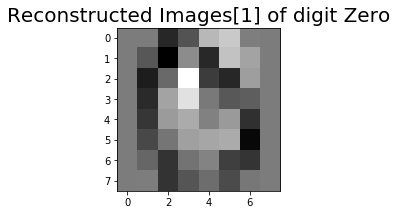

In [776]:
#Plotting the reconstructed Digit Zero
#Note: Remember to Transpose the reconstructed array back for image display!
pltp.figure(1, figsize=(3, 3))
pltp.imshow(np.reshape(reconstructXz.T[1],(8,8)), cmap = pltp.get_cmap('gray'),interpolation='nearest')
pltp.title("Reconstructed Images[1] of digit Zero", size = 20)
pltp.show()